---

## K-Nearest Neighbors (KNN) Algorithm and Applications
#### Language: Python 3.11.9
#### Author: Putian Gu

---

### Table of Contents

* [Introduction](#Introduction)
* [Algorithm](#Algorithm)
* [Illustration](#Illustration)
* [Advantages and Disadvantages](#Advantages_and_Disadvantages)
    * [Advantages](#Advantages)
    * [Disadvantages](#Disadvantages)
* [Code of KNN classifier and regressor](#Code)
* [Applications on data sets](#Applications)
    * [Classification problem](#Classification)
    * [Regression problem](#Regression)
* [How can $k$ impact prediction result](#k)

### Introduction <a class="anchor" id="Introduction"></a>
In this section we focus on a simple and straight-forward machine learning model, k-nearest neighbors (KNN). 

KNN is a non-parametric supervised model, and its main idea is to classify or regress by compute the k closest training examples in the data set. 

---

### Algorithm <a class="anchor" id="Algorithm"></a>
*k* is a pre-defined constant, and for
* classification tasks.
An unlabeled data point is classified by assigning the label which is most frequent among the *k* training samples nearest to that query point.

* regression tasks.
An unlabeled data point is predicted by averaging the values among the k training samples nearest to that query point. 

More formally, k-nearest-neighbor methods use those observations in the training set $T$ closest in input space to x to form $\hat{y}$. Specifically, the k-nearest neighbor fit for $\hat{y}$ is defined as follows:

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)}{x_i}$$

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample. Closeness implies a metric, which for the moment Euclidean distance is the most commonly-used distance. So, in words, we find the k observations with $x_i$ closest to $x$ in input space, and average their responses. 

For classification problems, labels are binary coded so $\hat{y}$ is the proportion of the class of '1', and it represents a majority vote in the neighborhood. For regression problems, labels are numeric so $\hat{y}$ is the average of neighborhoods.

Euclidean distance, which is the most commonly-used distance to calculate the distance between data points, is defined as follows:

$$ d(\boldsymbol{x}_i, \boldsymbol{x}_j) = \sqrt{\sum_{k=1}^{p} {(\boldsymbol{x}_{ik}-\boldsymbol{x}_{jk})^2}}  $$

where $\boldsymbol{x}_i$, $\boldsymbol{x}_j$ are two $1 \times p$ data point vectors.

Notice that the neighbors are taken from known data set, it can be thought of as the training data set for the algorithm, but in fact no explicit training step is required.


---

### Illustration <a class="anchor" id="Illustration"></a>

Take a look at the two-dimension space, we can have a intuitive idea about how knn works. The following figure by Navlani ([link](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)) clearly illustrates the algorithm of knn. 

Given the samples and the new data point in the sample space, distances between the new example data point and all other points are calculated and ranked ascending. Then the first $k$ samples are picked up, and a majority vote (for classification) or an average (for regression) is taken among the top $k$ samples to predict label of the new example.

![knn_illu](images/knn_illu.png)

---

### Advantages and Disadvantages <a class="anchor" id="Advantages_and_Disadvantages"></a>

#### Advantages: <a class="anchor" id="Advantages"></a>

* No training period. As discussed before, knn does not have a training period. This kind of learning model is called lazy learner (Instance based learning), which uses sample data set directly to make real-time predictions based on some algorithms. Thus knn is faster than some other algorithms which require training period (who are called eager learners).

* Supper simple. Knn is a very simple model which requires less computational resource, and it's eazy to implement. Also only two hyper-parameters, number of neighbors $k$ and distance function are required to be determined befor implying the algorithm.

* No assumptions needed. Knn requires no assumption on data distribution or other properties.

#### Disadvantages: <a class="anchor" id="Disadvantages"></a>

* Poor with large dataset. Computationally expensive when calculation the distances among all samples if the number of data is huge. 

* Poor with high dimensions. When number of dimension is high, it's hard for knn to represent the relative space relationship between data points, as data points become supper sparse. Also scales of different dimensions can largely affect the distances between points, so feature scaling must be down before using knn. Moreover, it's also computationally expensive to calculate the distances.

* Outlier, noise and missing value sensitivity. KNN is sensitive to noise and outliers in the dataset, and it cannot deal with missing values.

In [3]:
import sys
print(sys.executable)

f:\CMOR438\.venv\Scripts\python.exe


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rice_ml as ml

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score

from rice_ml.supervised_learning.knn import KNNClassifier
from rice_ml.supervised_learning.preprocessing import StandardScaler
from rice_ml.supervised_learning.post_processing import confusion_matrix


#### load Iris

In [4]:
data = load_iris(as_frame=True)
X = data.data.values   # (150,4)
y = data.target.values # (150,)
print("X shape:", X.shape, " y shape:", y.shape, " classes:", np.unique(y))


X shape: (150, 4)  y shape: (150,)  classes: [0 1 2]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

X_train[:2], y_train[:5]

(array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
        [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ]]),
 array([0, 2, 1, 0, 1]))

In [6]:
k_grid = [1, 3, 5, 7, 9, 11]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = {}
for k in k_grid:
    scores = []
    for tr_idx, va_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train[tr_idx], X_train[va_idx]
        y_tr, y_va = y_train[tr_idx], y_train[va_idx]
        model = KNNClassifier(n_neighbors=k, metric="euclidean", weights="uniform")
        model.fit(X_tr, y_tr)
        y_hat = model.predict(X_va)
        scores.append(accuracy_score(y_va, y_hat))
    cv_scores[k] = float(np.mean(scores))

cv_scores


{1: 0.95,
 3: 0.9666666666666668,
 5: 0.9583333333333334,
 7: 0.9333333333333333,
 9: 0.95,
 11: 0.95}

Let's have an overview of our dataset. 

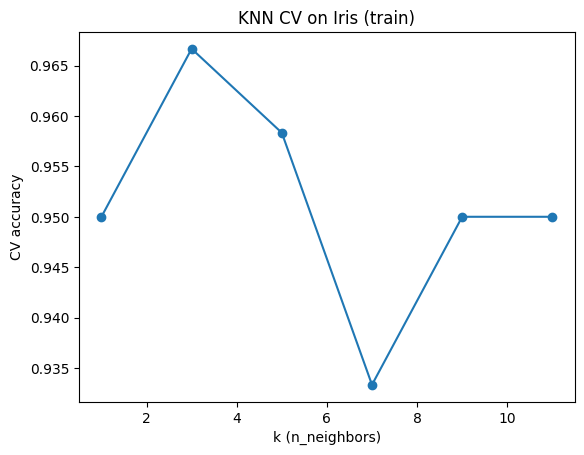

best_k = 3   best_cv_acc = 0.9666666666666668


In [7]:
plt.figure()
plt.plot(list(cv_scores.keys()), list(cv_scores.values()), marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV accuracy")
plt.title("KNN CV on Iris (train)")
plt.show()

best_k = max(cv_scores, key=cv_scores.get)
print("best_k =", best_k, "  best_cv_acc =", cv_scores[best_k])


In [8]:
model = KNNClassifier(n_neighbors=best_k, metric="euclidean", weights="uniform")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_acc:.3f}")


Test accuracy: 0.933


[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


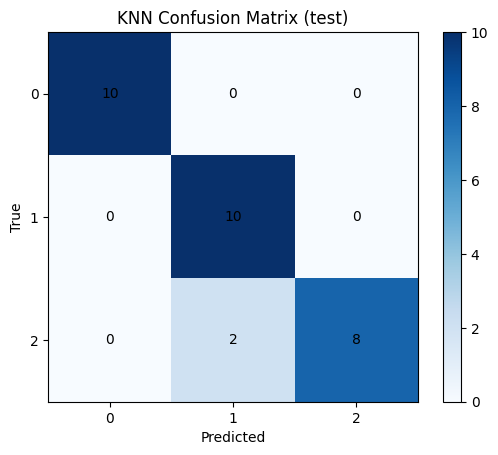

In [9]:
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(cm)

# 简单画图
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap="Blues")
ax.set_title("KNN Confusion Matrix (test)")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha="center", va="center")
fig.colorbar(im, ax=ax)
plt.show()


In [11]:
import pandas as pd

k_grid = [1,3,5,7,9,11,13,15]
metrics = ["euclidean","manhattan"]
weights = ["uniform","distance"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
for k in k_grid:
    for m in metrics:
        for w in weights:
            scores = []
            for tr, va in cv.split(X_train, y_train):
                clf = KNNClassifier(n_neighbors=k, metric=m, weights=w)
                clf.fit(X_train[tr], y_train[tr])
                scores.append(accuracy_score(y_train[va], clf.predict(X_train[va])))
            rows.append({"k":k,"metric":m,"weights":w,"cv_acc":float(np.mean(scores))})

df = pd.DataFrame(rows).sort_values("cv_acc", ascending=False).reset_index(drop=True)
df.head(10)


,k,metric,weights,cv_acc
0,3,euclidean,distance,0.966667
1,3,euclidean,uniform,0.966667
2,5,manhattan,distance,0.966667
3,11,euclidean,distance,0.966667
4,5,manhattan,uniform,0.958333
5,5,euclidean,distance,0.958333
6,5,euclidean,uniform,0.958333
7,3,manhattan,distance,0.958333
8,7,manhattan,distance,0.958333
9,7,manhattan,uniform,0.958333


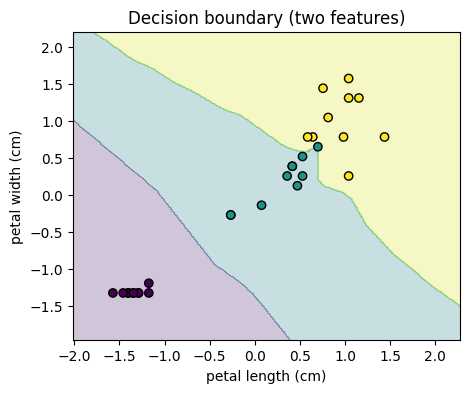

In [12]:
feat_i, feat_j = 2, 3  # petal length/width
x_min, x_max = X_train[:, feat_i].min()-0.5, X_train[:, feat_i].max()+0.5
y_min, y_max = X_train[:, feat_j].min()-0.5, X_train[:, feat_j].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# 只在这两维上训练一个模型（拷贝训练集这两列）
clf2 = KNNClassifier(n_neighbors=best_k)
clf2.fit(X_train[:, [feat_i, feat_j]], y_train)
Z = clf2.predict(grid).reshape(xx.shape)

plt.figure(figsize=(5,4))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X_test[:, feat_i], X_test[:, feat_j], c=y_test, edgecolors='k')
plt.title("Decision boundary (two features)")
plt.xlabel(data.feature_names[feat_i]); plt.ylabel(data.feature_names[feat_j])
plt.show()


In [13]:
from sklearn.neighbors import KNeighborsClassifier as SKKNN
sk = SKKNN(n_neighbors=best_k, metric="minkowski", p=2, weights="uniform")
sk.fit(X_train, y_train)
print("ours acc:", accuracy_score(y_test, model.predict(X_test)))
print("sklearn acc:", accuracy_score(y_test, sk.predict(X_test)))


ours acc: 0.9333333333333333
sklearn acc: 0.9333333333333333


Seems that there're three clusters in the figure, but their boundaries are not clear. Let's try our KNN model to predict new labels. 

Notice that there're 3 types of wines, we do a stratified sampling to make sure the ratios of types of wines are the same between training and test data set.

In [ ]:
import pandas as pd
out = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
out.to_csv("knn_iris_predictions.csv", index=False)
print("Saved: knn_iris_predictions.csv")


A good predictive accuracy.

Let's try to add one more features in our model.

The prediction accuracy is: 0.889


The predictive accuracy increases a little. Let's use all features.

The prediction accuracy is: 0.685


Looks like using all features won't increase the accuracy.

Notice that the ranges of different features vary, so some features may have a large impact during calculating the distance as Euclidean distance is sensitive to magnitudes. Let's scale them to 0 mean and 1 variance.

Let's apply the scaled data again. First we use the first two features.

The prediction accuracy is: 0.852


Emmm, the result decreases a little. Let's use the first three features.

The prediction accuracy is: 0.87


The result is still similar! Let's use all features.

The prediction accuracy is: 0.981
